# What this file contains

-   A class to calculate the energy of a term symbol for a given magnetic field B

In [1]:
import scipy.constants as c
import numpy as np

hbar = c.hbar # J*s

me = c.electron_mass # kg
qe = c.elementary_charge # C
mu_B = (-qe * hbar) / (2*me) 

B = 4.7e-4 # T (in gauss: 4.7 G)
    
class Termsymbol():
    def __init__(self, S, L, J):
        self.hbar = c.hbar # J*s
        self.mu_B = (-qe * hbar) / (2*me)
        self.S = S
        self.L = L
        self.J = J
        self.M_J = np.arange(-self.J, self.J + 1, 1)
        self.Delta_M_J = self.M_J[1] - self.M_J[0]
        self.G_L = ( (3*self.J*(self.J+1)) + (self.S*(self.S+1)) - (self.L*(self.L+1)) ) / (2*self.J*(self.J+1))

    def energy_H_B(self, B): # enter in SI units
        SI = - self.mu_B * self.G_L * self.M_J * B # in SI units (Joule) # a (-) was added to align MJ values with energy values
        self.MHz_per_G = (SI * 1e-6) / (self.hbar*2*np.pi) # calculate to (MHz) 
        # if B entered in [Gauss], then here a transformation would be necessary

        return self.MHz_per_G
    
    def energy_MJ_specific(self, MJ):
        index = np.where(self.M_J == MJ)[0]  # Find the index where b equals b_value
        if index.size > 0:  # Check if the value exists in b
            return self.MHz_per_G[index[0]]  # Return the corresponding value from a
        else:
            return None  # Return None if the value is not found in b


    
    def get_B(self, Delta_MHZ):
        B_in_Tesla = -(-Delta_MHZ * self.hbar * 2 * np.pi) / (self.Delta_M_J * self.mu_B * self.G_L * 1e-6)
        self.B_in_Gauss = B_in_Tesla * 1e4
        return self.B_in_Gauss

#                 "S" "L" "J"  
GRND = Termsymbol(0.5, 0, 0.5)
D5_2 = Termsymbol(0.5, 2, 2.5)
D3_2 = Termsymbol(0.5, 2, 1.5)
P3_2 = Termsymbol(0.5, 1, 1.5)
P1_2 = Termsymbol(0.5, 1, 0.5)

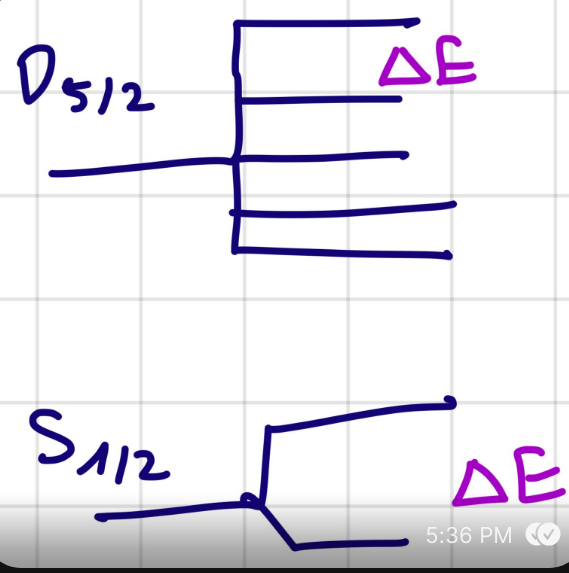

In [2]:
# the way i understood it is that we are interested in the energy difference \Delta E 

energy_GRND = GRND.energy_H_B(B)
energy_D5_2 = D5_2.energy_H_B(B)
energy_D3_2 = D3_2.energy_H_B(B)
energy_P3_2 = P3_2.energy_H_B(B)
energy_P1_2 = P1_2.energy_H_B(B)

print(f"Delta E GRND: {round(energy_GRND[0] - energy_GRND[1], 5)} Mhz")
print(f"Delta E D5/2: {round(energy_D5_2[0] - energy_D5_2[1], 5)} Mhz")
print(f"Delta E D3/2: {round(energy_D3_2[1] - energy_D3_2[2], 5)} Mhz")
print(f"Delta E P3/2: {round(energy_P3_2[0] - energy_P3_2[1], 5)} Mhz")
print(f"Delta E P1/2: {round(energy_P1_2[0] - energy_P1_2[1], 5)} Mhz \n")

GRND.get_B(energy_GRND[0] - energy_GRND[1])
D5_2.get_B(energy_D5_2[0] - energy_D5_2[1])
D3_2.get_B(energy_D3_2[0] - energy_D3_2[1]) 
P3_2.get_B(energy_P3_2[0] - energy_P3_2[1])
P1_2.get_B(energy_P1_2[0] - energy_P1_2[1]) 

print(f"magnetic field of GRND: {round(GRND.B_in_Gauss,2)} G")
print(f"magnetic field of D5_2: {round(D5_2.B_in_Gauss,2)} G")
print(f"magnetic field of D3_2: {round(D3_2.B_in_Gauss,2)} G")
print(f"magnetic field of P3_2: {round(P3_2.B_in_Gauss,2)} G")
print(f"magnetic field of P1_2: {round(P1_2.B_in_Gauss,2)} G")

Delta E GRND: -13.15647 Mhz
Delta E D5/2: -7.89388 Mhz
Delta E D3/2: -5.26259 Mhz
Delta E P3/2: -8.77098 Mhz
Delta E P1/2: -4.38549 Mhz 

magnetic field of GRND: 4.7 G
magnetic field of D5_2: 4.7 G
magnetic field of D3_2: 4.7 G
magnetic field of P3_2: 4.7 G
magnetic field of P1_2: 4.7 G


In [3]:
print(energy_GRND)
print(GRND.M_J)
print(energy_D5_2)

[-6.57823512  6.57823512]
[-0.5  0.5]
[-19.73470536 -11.84082322  -3.94694107   3.94694107  11.84082322
  19.73470536]


In [4]:
# from experiment       "S" "L" "J"      S1/2
from_paper = Termsymbol(0.5, 0, 0.5)
from_paper.get_B(10.057)

-3.5927493573696156

In [5]:
# 
upper = 10.057 + 0.0035 # 0.007 is how much it fluctuates
lower = 10.057 - 0.0035
#
high = from_paper.get_B(upper)
low = from_paper.get_B(lower)

print(f"high: {high}, low: {low} G")
print(f"difference in B = {round((high - low),5)} G")

high: -3.593999692733123, low: -3.5914990220061083 G
difference in B = -0.0025 G


In [6]:
# homework fermi golden rule -> understand the components (no necessity for derivation)

# play with his python code

# plot equation 1 for i in range(1,5) (see picture below)

In [7]:
# our system

S_1_2 = Termsymbol(0.5, 0, 0.5)
D_5_2 = Termsymbol(0.5, 2, 2.5)

